# IPSENSE internship project

This project was made by **Matheus Bellucio**. contact me on this email: matheusbellucio@gmail.com

<hr>

### Imports

In [9]:
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from typing import Callable

import requests
import json

<hr>

## Project Gutenberg Analysis

Project Gutenberg is an online library of free eBooks.

On this analysis we are going to look for some interesting data revolving around this free innitiative, those being:
- Books per author
- Top 10 genres
- Top 10 most downloaded books
- Relation between author Birth Year and Downloads/Popularity
- Most popular Authors

<hr>

### API endpoints

In [10]:
HEADERS = {
  'Content-Type': 'application/json',
  'Accept': 'application/json'
}

In [11]:
BOOKS = 'https://gutendex.com/books/'

In [12]:
NUM_PAGES = 156

### API Calls

In [13]:
def fetchJson(url: str, headers: dict) -> dict[str, any]:
  try: 
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    return response.json()
  except requests.exceptions.RequestException as err: 
    raise err

Function created to make the API call and return the JSON with the data

### Dataframe creation and Data formatting 

In [14]:
def get_data(fetch_data: Callable, url: str, headers: dict, num_pages: int) -> pd.DataFrame:

  data = []
  first_page = fetch_data(url=url, headers=headers)
  data.extend(first_page['results'])
  page_link = first_page['next']

  for i in range(1, num_pages):
    page = fetch_data(url=page_link, headers=headers)
    data.extend(page['results'])
    page_link = page['next']

  return pd.DataFrame(data)

As the Gutendex API is paginated, this function aims to do the disired amount of calls base on the number of pages specified <br>
and return the dataframe with the data of all pages fetched.

Due to the API being paginated, the wait time is too long. Therefore I will base this analysis on a 5000 books frame.

To avoid waiting 8 minutes to all the data being fetched, simply comment the first line bellow and uncomment the second one.

In [15]:
df_books = get_data(fetch_data=fetchJson, url=BOOKS, headers=HEADERS, num_pages=NUM_PAGES)
# df_books = pd.read_json('./data.json')

In [16]:
df_books.to_json('./data.json')

### Exploring the data

First, checking the colums to see how big is the dataframe we are handling

In [17]:
df_books.columns

Index(['id', 'title', 'authors', 'translators', 'subjects', 'bookshelves',
       'languages', 'copyright', 'media_type', 'formats', 'download_count',
       'author_birth_year', 'first_author'],
      dtype='object')

Then we check the shape, to see how many rows we are working with, and a sample from the head.

In [18]:
print(df_books.shape)
df_books.head()

(4992, 13)


,id,title,authors,translators,subjects,bookshelves,languages,copyright,media_type,formats,download_count,author_birth_year,first_author
0,1513,Romeo and Juliet,"[{'name': 'Shakespeare, William', 'birth_year'...",[],"[Conflict of generations -- Drama, Juliet (Fic...","[Browsing: Fiction, Browsing: Literature, Brow...",[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,79350,1564.0,"Shakespeare, William"
1,2701,"Moby Dick; Or, The Whale","[{'name': 'Melville, Herman', 'birth_year': 18...",[],"[Adventure stories, Ahab, Captain (Fictitious ...","[Best Books Ever Listings, Browsing: Fiction, ...",[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,72591,1819.0,"Melville, Herman"
2,1342,Pride and Prejudice,"[{'name': 'Austen, Jane', 'birth_year': 1775, ...",[],"[Courtship -- Fiction, Domestic fiction, Engla...","[Best Books Ever Listings, Browsing: Culture/C...",[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,58898,1775.0,"Austen, Jane"
3,37106,"Little Women; Or, Meg, Jo, Beth, and Amy","[{'name': 'Alcott, Louisa May', 'birth_year': ...",[],"[Autobiographical fiction, Bildungsromans, Dom...",[],[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,53439,1832.0,"Alcott, Louisa May"
4,145,Middlemarch,"[{'name': 'Eliot, George', 'birth_year': 1819,...",[],"[Bildungsromans, City and town life -- Fiction...","[Best Books Ever Listings, Browsing: Culture/C...",[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,53226,1819.0,"Eliot, George"


In [19]:
df_books.describe()

,id,download_count,author_birth_year
count,4992.000000,4992.000000,3943.000000
mean,27563.996795,1060.958734,1734.619833
std,21957.068280,3403.194303,419.691128
min,1.000000,278.000000,-750.000000
25%,6687.500000,339.000000,1803.000000
50%,25665.500000,455.000000,1844.000000
75%,43384.000000,768.250000,1867.000000
max,74328.000000,79350.000000,1971.000000


Then we proceed with the info method, to check the data types of the colums. More specific, if the download_count is an integer, <br>
to prepare it for future math operations. In this case is already an integer.

In [20]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 0 to 4991
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4992 non-null   int64  
 1   title              4992 non-null   object 
 2   authors            4992 non-null   object 
 3   translators        4992 non-null   object 
 4   subjects           4992 non-null   object 
 5   bookshelves        4992 non-null   object 
 6   languages          4992 non-null   object 
 7   copyright          4992 non-null   bool   
 8   media_type         4992 non-null   object 
 9   formats            4992 non-null   object 
 10  download_count     4992 non-null   int64  
 11  author_birth_year  3943 non-null   float64
 12  first_author       4992 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 640.9+ KB


<hr>

# General statistics

### Books per Author

As the authors in the dataframe can be an array of authors, the function bellow checks that and return the name, or the first author name.

In [21]:
def get_author_name(authors):
    if isinstance(authors, dict) and 'name' in authors:
        return authors['name']
    elif isinstance(authors, list) and len(authors) > 0:
        return authors[0].get('name', '')
    return ''


In [22]:
books_per_author = df_books['authors'].apply(get_author_name).value_counts()
print('Books per author: ')
books_per_author.head(10)[2:]

Books per author: 


authors
Dickens, Charles                 49
Shakespeare, William             46
Twain, Mark                      43
Anonymous                        40
Conrad, Joseph                   29
Plato                            28
Wells, H. G. (Herbert George)    27
Nietzsche, Friedrich Wilhelm     26
Name: count, dtype: int64

As we can see, Charles Dickens is the author with the most books in this Data Analysis, followed by Shakespeare.

### Top 10 Genres

First, lets normalize the genre names, making all upper case and removing any special characters.

In [23]:
def remove_special_characters(s):
    return ''.join(char for char in s if char.isalnum() or char.isspace())

In [24]:
def subjects_to_upper(subject):
    if isinstance(subject, list) and len(subject) > 0:
        return list(map(lambda x: remove_special_characters(x.upper()), subject))
    return None

In [25]:
popular_subjects = df_books['subjects'].apply(lambda x: subjects_to_upper(x)).explode().value_counts()
print("\nMost Popular Subjects:")
print(popular_subjects.head(5))


Most Popular Subjects:
subjects
SHORT STORIES         151
SCIENCE FICTION       139
LOVE STORIES          108
HISTORICAL FICTION    106
ADVENTURE STORIES     102
Name: count, dtype: int64


In Project Gutenberg, apparently the book genre that has the most books is Short Stories, followed up by Science Fiction.<br>
The real surprise here is the genre 'Bildungsromans' being in the 10th position.

### Top 10 most downloaded books

In [26]:
most_downloaded_books = df_books.sort_values('download_count', ascending=False).head(10)

top_downloads_bar = px.bar(
  x=most_downloaded_books.title, 
  y=most_downloaded_books.download_count, 
  title='Top 10 most downloaded books',
  height=700
)
top_downloads_bar.show()

We can conclude that the classic books are indeed the most downloaded, with a romance novel being in the 1st position, <br> 
although the romance genre being the 3rd most common genre.

# Relation between author Birth Year and Downloads/Popularity

If multiple authors, a validation must be done to get the birth year either from a string or a list.

In [27]:
def get_author_birth_year(authors):
    if isinstance(authors, list) and len(authors) > 0:
        return authors[0].get('birth_year', None)
    return None

In [28]:
df_books['author_birth_year'] = df_books['authors'].apply(get_author_birth_year)

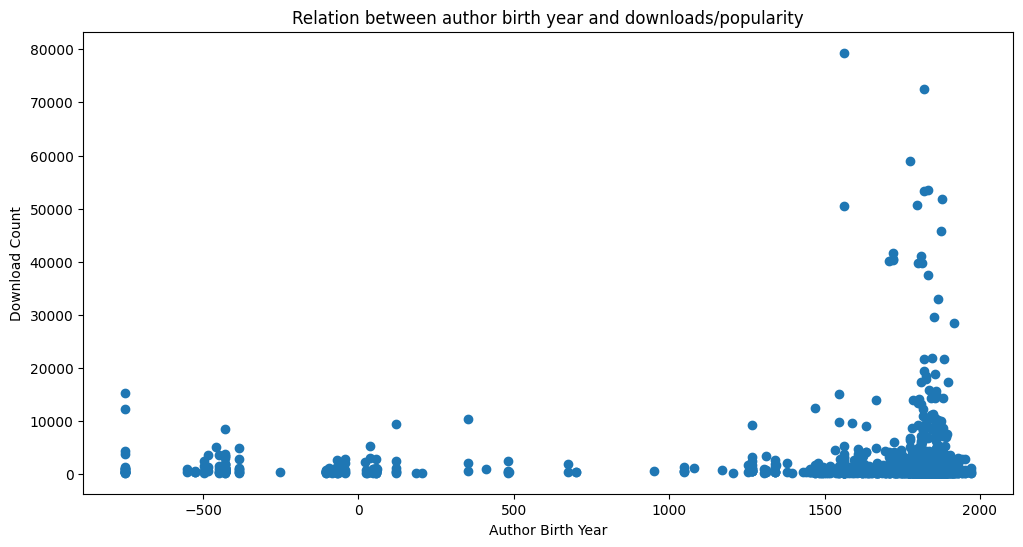

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(df_books['author_birth_year'], df_books['download_count'])
plt.xlabel('Author Birth Year')
plt.ylabel('Download Count')
plt.title('Relation between author birth year and downloads/popularity')
plt.xticks()
plt.show()

As we can see, the most downloaded books are from the 17th, 18th and 19th century. We can therefore conclude that the Project Gutenberg has a vital role of exposing old literature to this new digital world, bringing people the the views and sentiments of the past generations, across multiple centuries.

# Most popular Authors

first, we create a first_author column in our dataframe. Then we get the name, depending if the book has multiple or just one author. <br>
We proceed to create a new dataframe grouping by the first_author and then aggregating with the downloading count, summing all of them. <br>
We use the reset_index() function to having normal numeric index instead of the author's name.

In [30]:
df_books['first_author'] = df_books['authors'].apply(lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 else 'Unknown')

author_download_counts = df_books.groupby('first_author').agg({'download_count': 'sum'}).reset_index()
author_download_counts.columns = ['Author', 'Total Downloads']
author_download_counts = author_download_counts[author_download_counts['Author'] != 'Various']
author_download_counts = author_download_counts.sort_values('Total Downloads', ascending=False)[1:11]

In [31]:
author_download_counts.sample(2)

,Author,Total Downloads
113,"Austen, Jane",94226
1506,"Montgomery, L. M. (Lucy Maud)",70488


<BarContainer object of 10 artists>

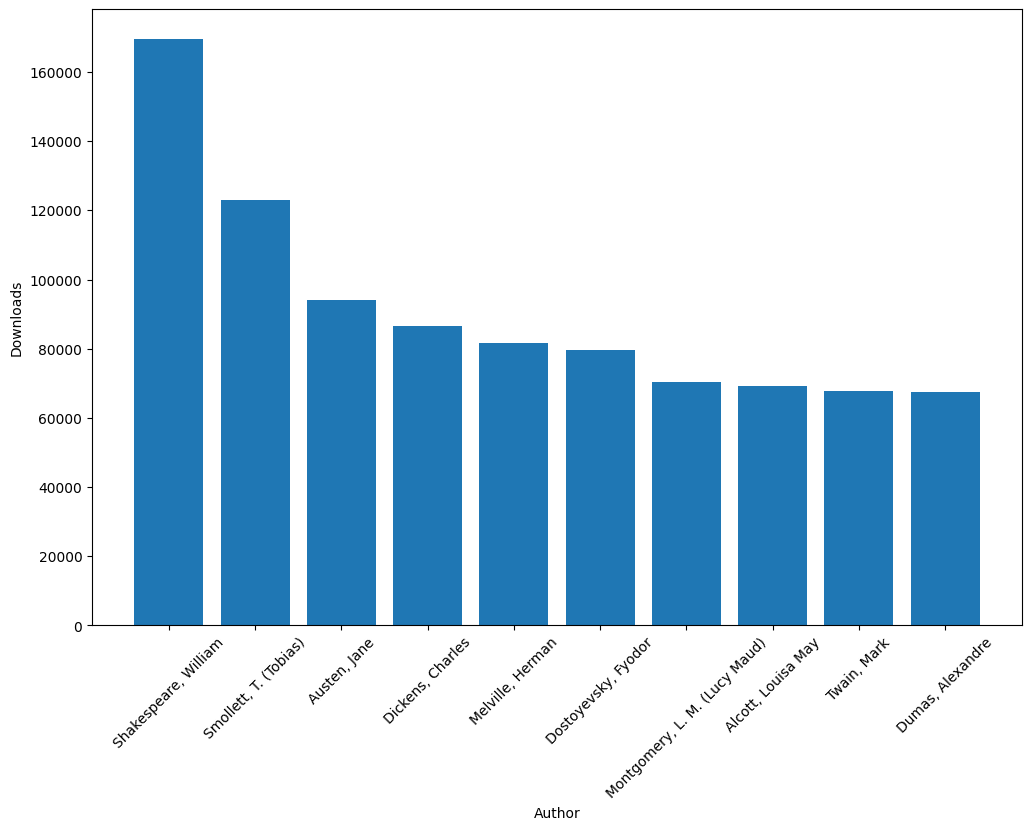

In [32]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel('Author')
plt.ylabel('Downloads')

plt.bar(author_download_counts['Author'], author_download_counts['Total Downloads'])

Indeed, an author from the 17th century has the most downloads in books published combined. It matches with the last analysis we did.

<hr>

I was not able to implement any free LLM. This particular one give me a generic "internal server error"

In [51]:
import os
from dotenv import load_dotenv
from pandasai import SmartDataframe
from langchain_groq.chat_models import ChatGroq
from langchain_community.llms import Ollama

In [34]:
load_dotenv()

True

In [55]:
api_key = os.environ.get("GROQ_API_KEY")
llm = Ollama(model='llama3')
llm_df_books = SmartDataframe(author_download_counts, config={'llm': llm})

In [56]:
llm = ChatGroq(
  model_name='mixtral-8x7b-32768',
  api_key=os.environ['GROQ_API_KEY']
)

In [57]:
df = SmartDataframe(author_download_counts, config={'llm': llm})

In [58]:
df.chat("hello")

Traceback (most recent call last):
  File "e:\projects\ipsense\env\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 283, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\projects\ipsense\env\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "e:\projects\ipsense\env\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "e:\projects\ipsense\env\Lib\site-packages\pandasai\pipelines\chat\prompt_generation.py", line 37, in execute
    self.logger.log(f"Using prompt: {prompt}")
                                    ^^^^^^^^
  File "e:\projects\ipsense\env\Lib\site-packages\pandasai\prompts\base.py", line 54, in __str__
    return self.to_string()
           ^^^^^^^^^^^^^^^^
  File "e:\projects\ipsense\env\Lib\site-pac

'Unfortunately, I was not able to answer your question, because of the following error:\n\nTraining failed because of internal server error try again later!\n'